Problem Description
A Chinese automobile company aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. Essentially, the company wants to know:
• Which variables are significant in predicting the price of a car
• How well those variables describe the price of a car
Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the American market.
Business Goal
You are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for the management to
understand the pricing dynamics of a new market.
Dataset:  Data
Dear students,
Apply any 5 algorithms to the regression problem provided.
For example:
Linear Regression
Decision Tree Regressor
Random Forest Regressor
Gradient Boosting Regressor
Support Vector Regressor
Rootmap:
1. Understand problem statement
2. Import necessary libraries and data
3.  Check the data
Info()
Describe((
Isnull()
Duplicated()
Df. Columns
Length of unique values in each column.
4. Data preprocessing
Drop car id
Find unique values in categorical or count plot
extract company name from car name and address this new col to df also remove car name column.
There are spelling mistakes in company name. Treat this.
Label encoding all the categorical columns
Outliers detection and removal( if present)
5. Feature selection
Find correlation matrix
Remove multicolinearity (remove features with High correlation .85 to 1)
6. Data splitting
Test, train
7. Model selection and implementation
8. Model evaluation

## Project Overview: Predicting Car Prices for a Chinese Automobile Company Entering the US Market

### Objective
A Chinese automobile company plans to enter the US market by setting up a local manufacturing unit to produce cars and compete with US and European automakers. To assist with this, they have contracted an automobile consulting firm to investigate the **key factors influencing car prices** in the American market, which may differ significantly from the Chinese market.

### Key Questions
- **Which variables are significant in predicting the price of a car?**
- **How well do those variables describe the price of a car?**

### Data Collection
The consulting firm has conducted extensive market surveys and compiled a large dataset comprising various types of cars available in the US market.

### Business Goal
The aim is to develop a model that predicts car prices based on the available independent variables. The model will help the company:
- **Understand how different factors impact car pricing**, enabling them to fine-tune car designs and business strategies to achieve specific price points.
- **Gain insights into the pricing dynamics** of the new market, assisting management in making informed decisions as they enter the US automotive industry.


#### Import necessary libraries and data

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
df=pd.read_csv("CarPrice_Assignment.csv")
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


### Check the data

In [3]:
df.shape

(205, 26)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [5]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [6]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [7]:
df[df.duplicated()]

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


In [8]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [9]:
# number of unique valuess in each column
df.nunique()

car_ID              205
symboling             6
CarName             147
fueltype              2
aspiration            2
doornumber            2
carbody               5
drivewheel            3
enginelocation        2
wheelbase            53
carlength            75
carwidth             44
carheight            49
curbweight          171
enginetype            7
cylindernumber        7
enginesize           44
fuelsystem            8
boreratio            38
stroke               37
compressionratio     32
horsepower           59
peakrpm              23
citympg              29
highwaympg           30
price               189
dtype: int64

### Data preprocessing

##### Here we display unique values in each column that are caegorical and object datatype 

In [10]:
# Create a dictionary to store the unique values for each categorical column
unique_values_dict = {}

# Loop through each categorical column and store its unique values
for column in df.columns:
    unique_values_dict[column] = df[column].unique()

# Display the unique values for all categorical columns
for column, unique_values in unique_values_dict.items():
    print(f"Unique values in '{column}':")
    print(unique_values)
    print("\n")

Unique values in 'car_ID':
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205]


Unique values in 'symboling':
[ 3  1  2  0 -1 -2]


Unique values in 'CarName':
['alfa-romero giulia' 'alfa-romero stelvio' 'alfa-romero Q

In [11]:
# drop car_ID
df.drop(['car_ID'], axis=1, inplace=True)
df

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [12]:
#extract company name from car name and address this new col to df also remove car name column.
df['company'] = df['CarName'].apply(lambda x: x.split(' ')[0])
df.drop('CarName', axis=1, inplace=True)

In [13]:
df['company'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [14]:
# Treat the spelling mistakes in company name. 
corrections = {
     'vw': 'volkswagen',
    'vokswagen': 'volkswagen',
    'toyouta': 'toyota',
    'porcshce': 'porsche',
    'maxda':'mazda',
    'nissan':'Nissan'
    }
df['company'] = df['company'].replace(corrections)
companies = df['company'].unique()
companies

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'Nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [15]:
df

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,company
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0,volvo
201,-1,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,...,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0,volvo
202,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0,volvo
203,-1,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,...,idi,3.01,3.40,23.0,106,4800,26,27,22470.0,volvo


In [16]:
df.columns

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price', 'company'],
      dtype='object')

In [17]:
# Label encoding all the categorical columns
le=LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col]=le.fit_transform(df[col])

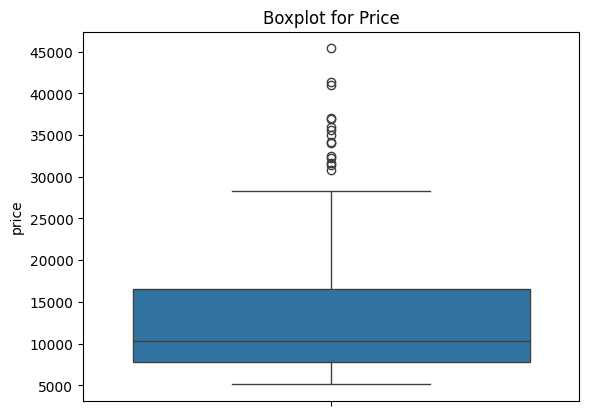

In [18]:
# Outliers detection and removal( if present)
sns.boxplot(df['price'])
plt.title("Boxplot for Price")
plt.show()

In [19]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df1 = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]
print("Data after removing outliers:")
print(df1)

Data after removing outliers:
     symboling  fueltype  aspiration  doornumber  carbody  drivewheel  \
0            3         1           0           1        0           2   
1            3         1           0           1        0           2   
2            1         1           0           1        2           2   
3            2         1           0           0        3           1   
4            2         1           0           0        3           0   
..         ...       ...         ...         ...      ...         ...   
200         -1         1           0           0        3           2   
201         -1         1           1           0        3           2   
202         -1         1           0           0        3           2   
203         -1         0           1           0        3           2   
204         -1         1           1           0        3           2   

     enginelocation  wheelbase  carlength  carwidth  ...  fuelsystem  \
0                 0  

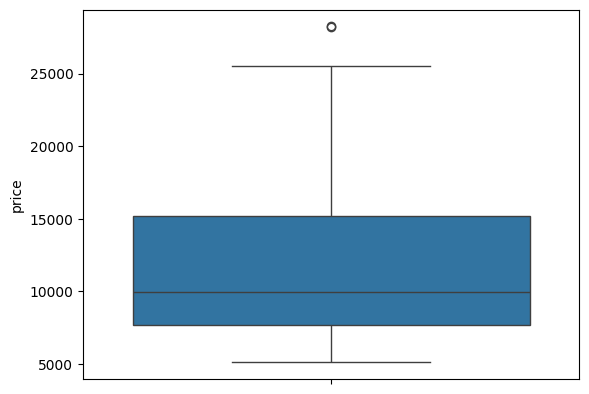

In [20]:
sns.boxplot(df1['price'])
plt.show()

### Feature selection
- Find correlation matrix
- Remove multicolinearity (remove features with High correlation .85 to 1)

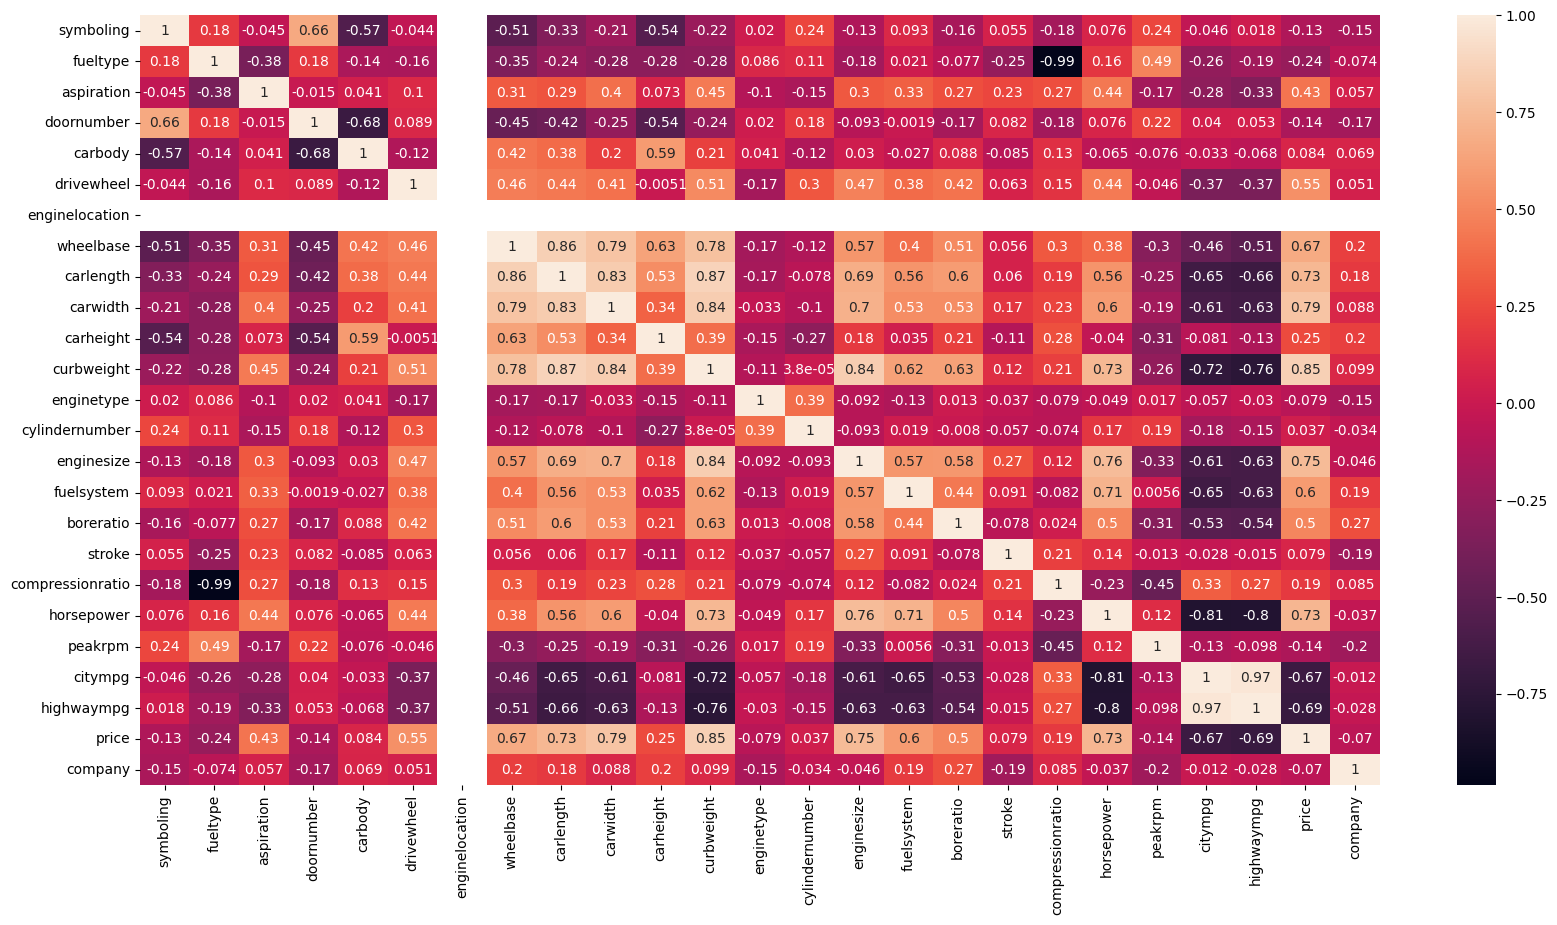

In [21]:
correlation_matrix = df1.corr()
plt.figure(figsize=(20,10))
sns.heatmap(df1.corr(), annot=True)
plt.show()

In [22]:
upper_triangle_mask = np.triu(np.ones_like(correlation_matrix, dtype=bool), k=1)
correlation_threshold = 0.85
target_var = 'price'
columns_to_drop = set()
for row in range(len(correlation_matrix.columns)):
    for col in range(row):
        if correlation_matrix.iloc[row, col] > correlation_threshold:
            col_name_row = correlation_matrix.columns[row]
            col_name_col = correlation_matrix.columns[col]

            if col_name_row != target_var:
                columns_to_drop.add(col_name_row)
            if col_name_col != target_var:
                columns_to_drop.add(col_name_col)
filtered_df = df1.drop(columns=[col for col in columns_to_drop if col != target_var])
print("Columns removed due to multicollinearity (excluding target variable):")
print([col for col in columns_to_drop if col != target_var])
print("Remaining columns:")
print(filtered_df.columns)

Columns removed due to multicollinearity (excluding target variable):
['wheelbase', 'curbweight', 'highwaympg', 'citympg', 'carlength']
Remaining columns:
Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'carwidth', 'carheight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'price', 'company'],
      dtype='object')


In [23]:
reduced_correlation_matrix = filtered_df.corr()

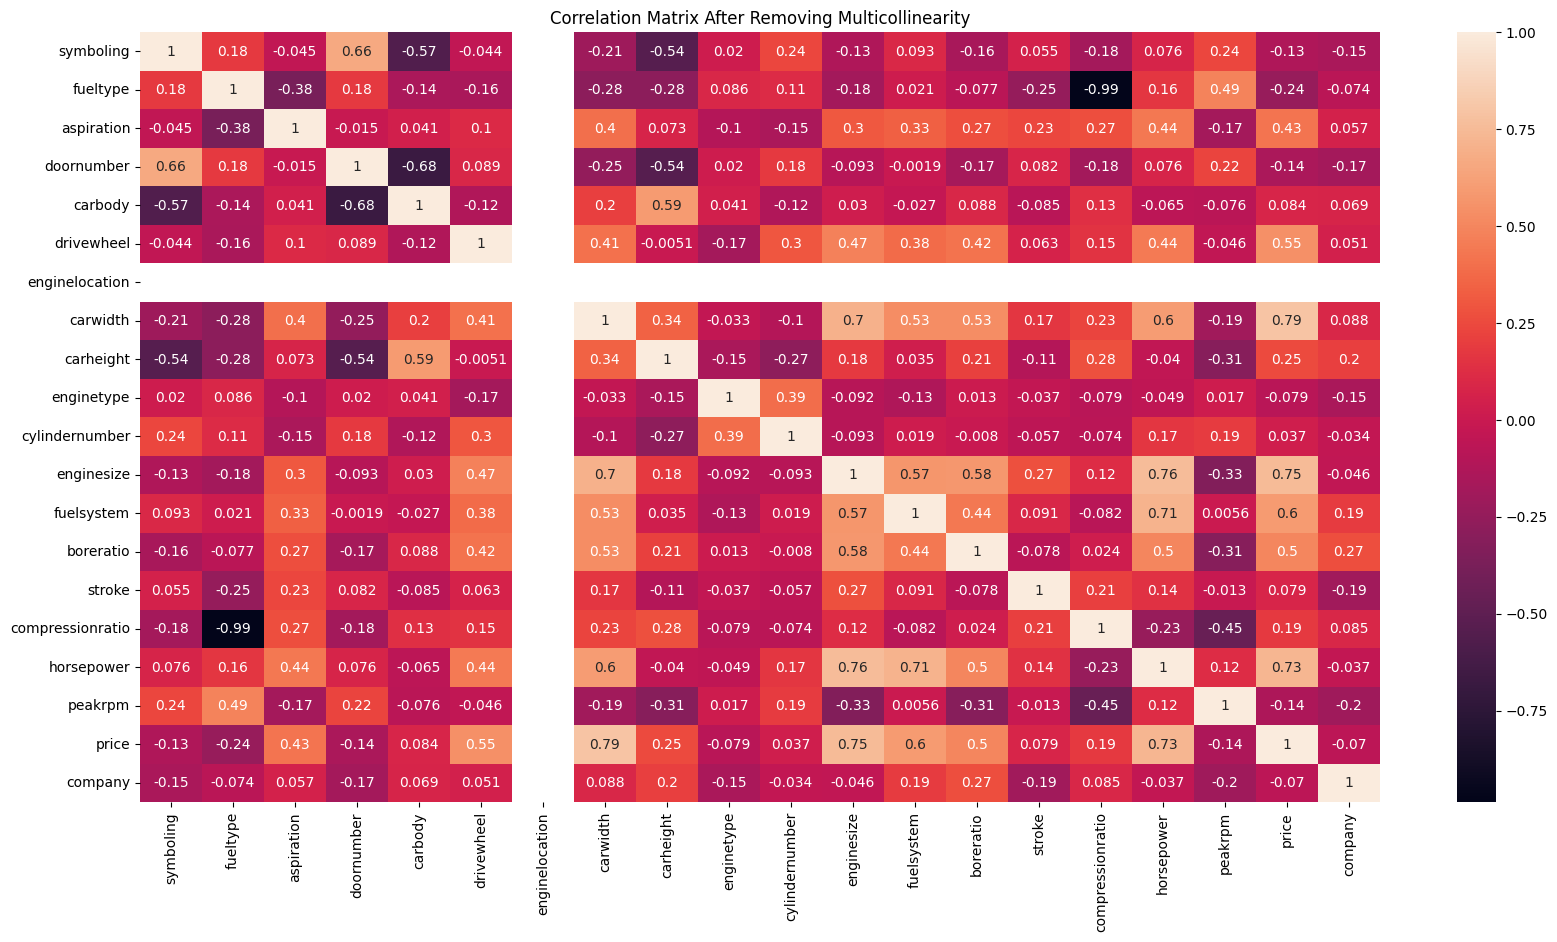

In [24]:
plt.figure(figsize=(20, 10))
sns.heatmap(reduced_correlation_matrix, annot=True)
plt.title('Correlation Matrix After Removing Multicollinearity')
plt.show()

### Data splitting

In [25]:
X = filtered_df.drop(["price"],axis=1)  
y = filtered_df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training set features shape:", X_train.shape)
print("Testing set features shape:", X_test.shape)
print("Training set target shape:", y_train.shape)
print("Testing set target shape:", y_test.shape)

Training set features shape: (152, 19)
Testing set features shape: (38, 19)
Training set target shape: (152,)
Testing set target shape: (38,)


### Model selection, implementation and evaluation

In [27]:
# Models to evaluate
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'Support Vector Regressor': SVR()
}

# Dictionary to store the metrics for each model
metrics_dict = {}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate the metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = mse ** 0.5
    r2 = r2_score(y_test, y_pred)

    # Store the metrics in a dictionary for the current model
    metrics_dict[name] = {
        'MSE': mse,
        'RMSE': rmse,
        'R²': r2
    }

# Print the metrics for each model
for model_name, metrics in metrics_dict.items():
    print(f"{model_name} Performance Metrics:")
    for metric_name, value in metrics.items():
        print(f"  {metric_name}: {value}")



Linear Regression Performance Metrics:
  MSE: 3236009.820030714
  RMSE: 1798.8912752111269
  R²: 0.8074896353118381
Decision Tree Performance Metrics:
  MSE: 2819730.741628658
  RMSE: 1679.205389947477
  R²: 0.8322540957591402
Random Forest Performance Metrics:
  MSE: 1908823.8075749874
  RMSE: 1381.6018990921327
  R²: 0.8864439888139095
Gradient Boosting Performance Metrics:
  MSE: 2054436.5252960317
  RMSE: 1433.330570837039
  R²: 0.8777814819147659
Support Vector Regressor Performance Metrics:
  MSE: 17228185.891430188
  RMSE: 4150.684990628678
  R²: -0.024905526659740218


In [30]:
metrics_df = pd.DataFrame(metrics_dict).T  # Transpose to make models the index

print(metrics_df)


                                   MSE         RMSE        R²
Linear Regression         3.236010e+06  1798.891275  0.807490
Decision Tree             2.819731e+06  1679.205390  0.832254
Random Forest             1.908824e+06  1381.601899  0.886444
Gradient Boosting         2.054437e+06  1433.330571  0.877781
Support Vector Regressor  1.722819e+07  4150.684991 -0.024906


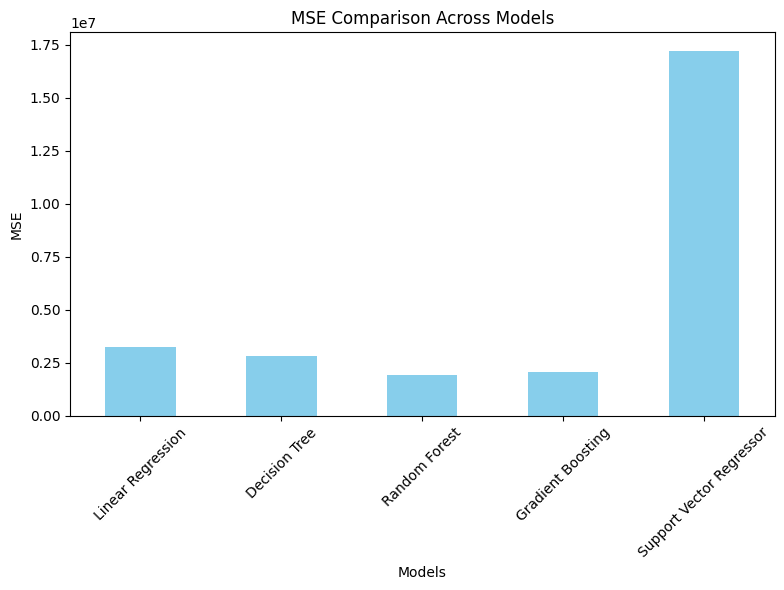

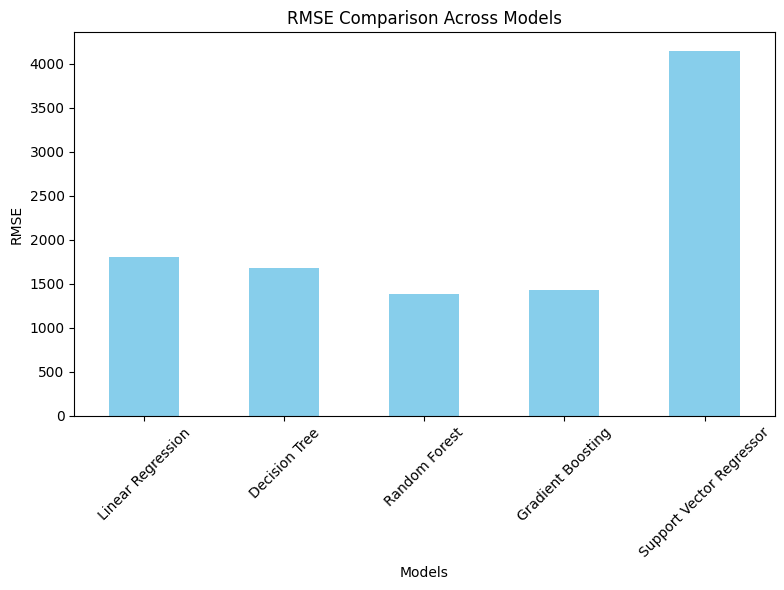

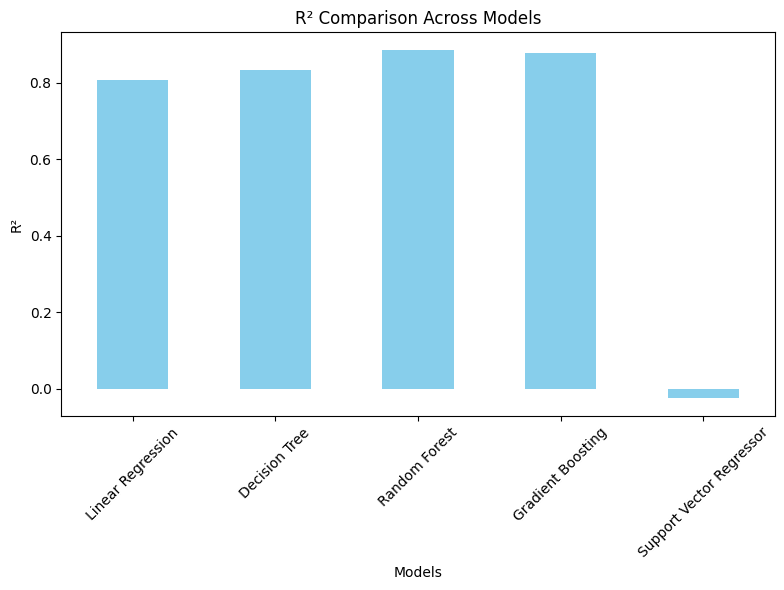

In [32]:
# Create a bar plot for each metric
for col in metrics_df.columns:
    plt.figure(figsize=(8, 6))
    metrics_df[col].plot(kind='bar', color='skyblue')
    plt.title(f'{col} Comparison Across Models')
    plt.xlabel('Models')
    plt.ylabel(col)
    plt.xticks(rotation=45)
    plt.tight_layout()  # Adjust layout to make sure labels fit
    plt.show()

#### Analysis
- Top-Performing Model: The Random Forest Regressor stands out as the top performer, achieving the lowest error metrics and the highest R² score. It effectively captures the data relationships better than the other models.
#### Conclusion
- The findings suggest that ensemble methods, with the Random Forest Regressor being particularly effective, offer the most reliable predictions for   car prices in this scenario. These insights can be utilized by the Chinese automobile company to refine their car designs and pricing strategies, enhancing their chances of success in the U.S. market.